In [1]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [2]:
from urllib.parse import quote
import math

## 네이버 지식인으로 워드클라우드 만들기

### 네이버 지식인 크롤링

In [4]:
driver = webdriver.Chrome('./chromedriver')
keyword = quote('여친 선물')
ma_url = 'https://kin.naver.com/search/list.nhn'

In [5]:
url = f'{ma_url}?query={keyword}&page=1'
driver.get(url)
time.sleep(1)

ul = driver.find_element_by_css_selector('.basic1')
lis = ul.find_elements_by_tag_name('li')
ans_href_list = []
for li in lis:
    atag = li.find_element_by_tag_name('a')
    ans_href = atag.get_attribute('href')
    ans_href_list.append(ans_href)

In [6]:
driver.get(ans_href_list[0])
time.sleep(1)
count = int(driver.find_element_by_css_selector('._answerCount.num').text)
count

12

In [7]:
for next in range(math.floor((count-1)/5)):
    more = driver.find_element_by_id('nextPageButton')
    more.click()
    time.sleep(1)

In [9]:
answers = driver.find_elements_by_css_selector('._endContentsText.c-heading-answer__content-user')
for i, answer in enumerate(answers):
    print(f'{i}=========================')
    print(answer.text)

0=========================
반지!목걸이!!!!!!!!
1=========================
커플 가디건이나 커플 모자는 어떠신지요 :-)
몇개 추천제품들 투척하고 갑니다 ㅎㅎ
더클래식 남녀 커플룩 오버핏 빅사이즈 하프 니트 가디건
COUPANG
coupa.ng
남녀공용 체크 라인 오버핏 가디건 커플룩
COUPANG
coupa.ng
로파웨어 커플 오버핏 가디건 남자 여자 봄 가을 겨울 루즈핏 니트(DUHV4423)
COUPANG
coupa.ng
남녀공용 커플 오버핏 스냅 가디건
COUPANG
coupa.ng
남녀공용 오버핏 커플 패턴 니트 가디건 3컬러
COUPANG
coupa.ng
인기신상 남여 가을겨울 오버핏 세련된 V넥 니트가디건 커플가디건
COUPANG
coupa.ng
남녀공용 오버핏 체크 브이넥 버튼 커플 가디건 2컬러
COUPANG
coupa.ng
남여공용 아우터 루즈핏 타이드 카라 커플룩 가디건
COUPANG
coupa.ng
레인보우 영문레터링 포인트 블랙볼캡 커플모자 야구모자
COUPANG
coupa.ng
혹은 브랜드 있는 모자들 추천드려요!@
쇼핑에 성공하시길 바라며, 
도움이 되셨다면 채택 부탁드려요 ✿˘◡˘✿
파트너스커미션을 지급 받을 수 있습니다.
2=========================
https://m.smartstore.naver.com/s0ul/products/5182838896
97샵 별수호자돼지 디퓨저<핸드메이드> : 97샵
[97샵] 공장 상품이 아닌 재구매율97% 한번 구매하면 또 돌아오실거에요 !
m.smartstore.naver.com
개지림 저 믿어보셈 
3=========================
마크곤잘레스 후드티 추천드립니다.
스몰 사인 로고 후디 그레이
cay.kr
4=========================
안녕하세요! 
노미네이션 컴포저블 팔찌 선물 추천드려용 ㅎㅎ
2000개가 넘는 링크 중에서 직접 골라서 세상에서 단 하나뿐인 팔찌인거죠.
노미네이션 클래식 링크로

In [10]:
gift_text = '' 
for page in range(1,11): # 1에서 10까지
    url = f'{kin_url}?query={search}&page={page}' 
    driver.get(url)
    print(page, end=' ')
    time.sleep(1)

    ul = driver.find_element_by_css_selector('.basic1')
    lis = ul.find_elements_by_tag_name('li')

    ans_href_list = []
    for li in lis: # 답변 글의 href 10개 구해서 href_list 만들기
        atag = li.find_element_by_tag_name('a')
        ans_href = atag.get_attribute('href')
        ans_href_list.append(ans_href)
    time.sleep(1)

    for ans_href in ans_href_list: # href_list for loop
        driver.get(ans_href) 
        time.sleep(1)
        count = int(driver.find_element_by_css_selector('._answerCount.num').text) # 답변 갯수를 구한다
        #print(count)
        for next in range(math.floor((count-1)/5)):
            more = driver.find_element_by_id('nextPageButton')
            more.click()  # 답변 갯수에 맞춰 더보기를 클릭
            time.sleep(1)

        answers = driver.find_elements_by_class_name('_endContentsText.c-heading-answer__content-user') #답변이 있는 css Selector를 찾는다-> list
        for answer in answers: # list for loop # 답변의 text를 찾는다.
            #print('#', sep='', end='') 
            gift_text += '\n' + answer.text 
        #print()
        time.sleep(1)

1 2 3 4 5 6 7 8 9 10 

In [11]:
file = open('./results/gift.txt', 'w', encoding='utf-8')
file.write(gift_text)
file.close()

In [12]:
gift_text = open('./results/gift.txt', encoding='utf-8').read()

## 명사 추출하기

In [17]:
import nltk
from konlpy.tag import Okt
from konlpy.corpus import kobill

In [20]:
okt = Okt()

In [24]:
tokens_ko = okt.nouns(gift_text)
tokens_ko[:5]

['반지', '목걸이', '커플', '가디건', '커플']

In [25]:
# 영문자, 숫자 제거
import re
new_gift_text = []
for token in tokens_ko:
    text = re.sub('[a-zA-Z0-9]', '', token)
    new_gift_text.append(text)

In [26]:
new_gift_text[:5]

['반지', '목걸이', '커플', '가디건', '커플']

In [27]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

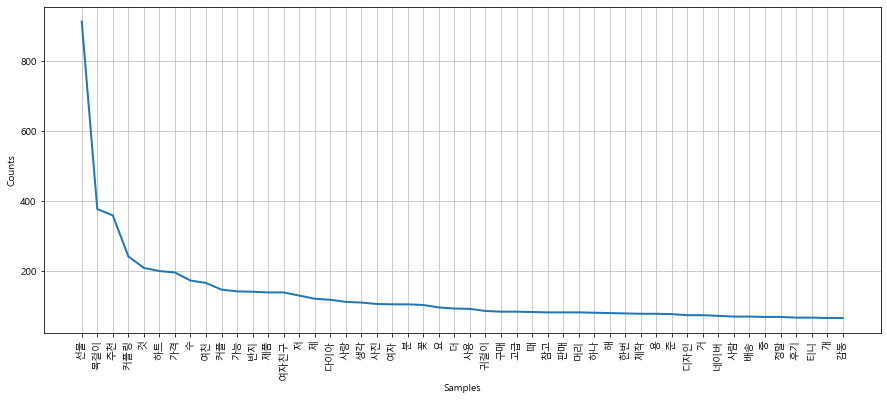

In [29]:
# 수집된 단어의 횟수 및 고유한 횟수
ko = nltk.Text(new_gift_text, name='여자친구선물')
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

In [40]:
ko = nltk.Text(new_gift_text, name='여자친구선물')
ko.vocab().most_common(100)

[('선물', 914),
 ('목걸이', 378),
 ('추천', 360),
 ('커플링', 243),
 ('것', 210),
 ('하트', 201),
 ('가격', 197),
 ('수', 174),
 ('여친', 167),
 ('커플', 148),
 ('가능', 143),
 ('반지', 142),
 ('제품', 140),
 ('여자친구', 140),
 ('저', 131),
 ('제', 122),
 ('다이아', 119),
 ('사랑', 113),
 ('생각', 111),
 ('사진', 107),
 ('여자', 106),
 ('분', 106),
 ('꽃', 104),
 ('요', 97),
 ('더', 94),
 ('사용', 93),
 ('귀걸이', 87),
 ('구매', 85),
 ('고급', 85),
 ('때', 84),
 ('참고', 83),
 ('판매', 83),
 ('머리', 83),
 ('하나', 82),
 ('해', 81),
 ('한번', 80),
 ('제작', 79),
 ('용', 79),
 ('준', 78),
 ('디자인', 75),
 ('거', 75),
 ('네이버', 73),
 ('사람', 71),
 ('배송', 71),
 ('중', 70),
 ('정말', 70),
 ('후기', 68),
 ('티니', 68),
 ('개', 67),
 ('감동', 67),
 ('세대', 67),
 ('인기', 66),
 ('상품', 66),
 ('직접', 66),
 ('브랜드', 64),
 ('선택', 64),
 ('곳', 64),
 ('끈', 63),
 ('모양', 63),
 ('팔찌', 61),
 ('마감', 60),
 ('악세사리', 60),
 ('네임카드', 60),
 ('등', 59),
 ('큐빅', 59),
 ('요즘', 58),
 ('곱창', 58),
 ('케이스', 58),
 ('아이패드', 58),
 ('인테리어', 57),
 ('링', 56),
 ('오늘', 55),
 ('가지', 54),
 ('남녀', 52),
 ('그냥', 52),
 ('

In [62]:
stop_words = ['선물','추천','것','가격','수','여친','커플','가능','제품','여자친구','저','제','사랑','생각',
    '여자','분','요','더','사용','구매','때','고급','참고','판매','머리','하나','해','한번','제작','용','준',
    '디자인','거','네이버','사람','배송','중','정말','후기','개','감동',
    '네이버','네임카드','변경','등','가장','세대','남녀','할인','처리','정보','사이트','협찬','주소','곱창',
    '인기','브랜드','가능','조금','그냥','남자','모델','저','아이템','여자','직접','하나','날','답변','아래',
    '세대','센스','곳','몇개','투척','신지','클래식','빅사','이즈','하프','공용','체크','주얼리','포장','색상','버핏','도움',
    '의미','변경','부담','위','오늘','상품','전','때문','마감','여성','스타일','모양','쇼핑','정도','기념일','요즘','친구',
    '스토어','선택','소품','심플','링크','아주','스','이면','여','남','지금','고민','안쪽','예','인테리어','이벤트','처','질문',
    '꼭','나','쇼핑몰','등등','생일','메이드','미만','드라마','평이','보고','검색','세트','님','주문','구성','확인','경우','최고',
    '종류','착용','남자친구','여자친구','가족','시간','하루','또한','일단','데','여기','이번','좀','및','준비','유광','무광','토닥토닥','다른']
new_gift_text = [each_word for each_word in ko if each_word not in stop_words] # 스탑워즈에 속하지 않은 것만 추출한다
new_gift_text[:10]

['반지', '목걸이', '가디건', '모자', '커플룩', '니트', '가디건', '라인', '가디건', '커플룩']

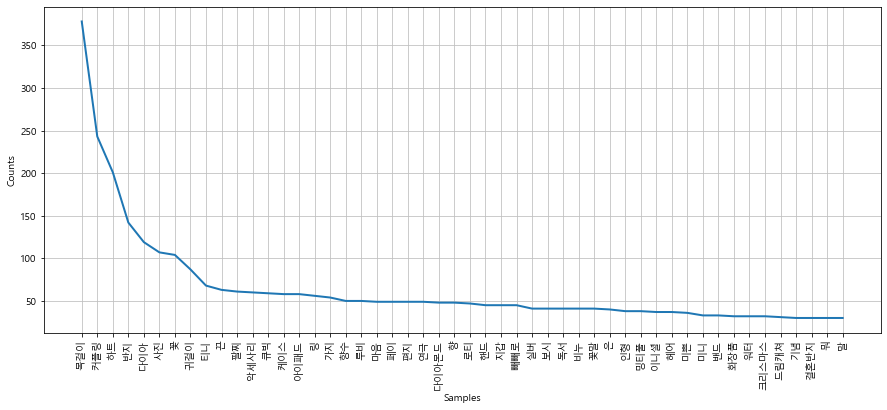

In [63]:
ko = nltk.Text(new_gift_text, name='여자친구선물')
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

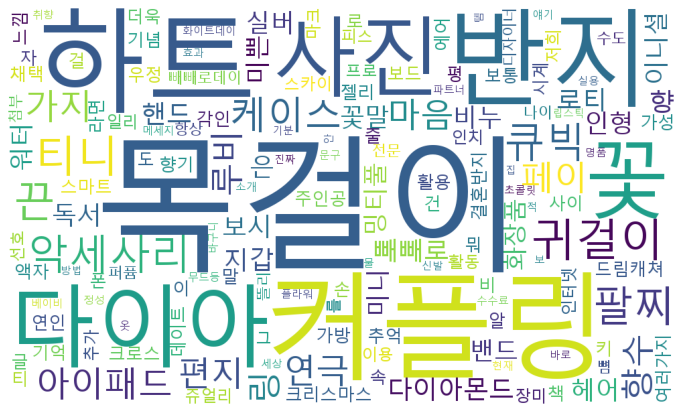

In [64]:
from wordcloud import WordCloud
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      width=1000, height=600
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [67]:
from PIL import Image
mask = np.array(Image.open('./data/heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [68]:
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.3, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

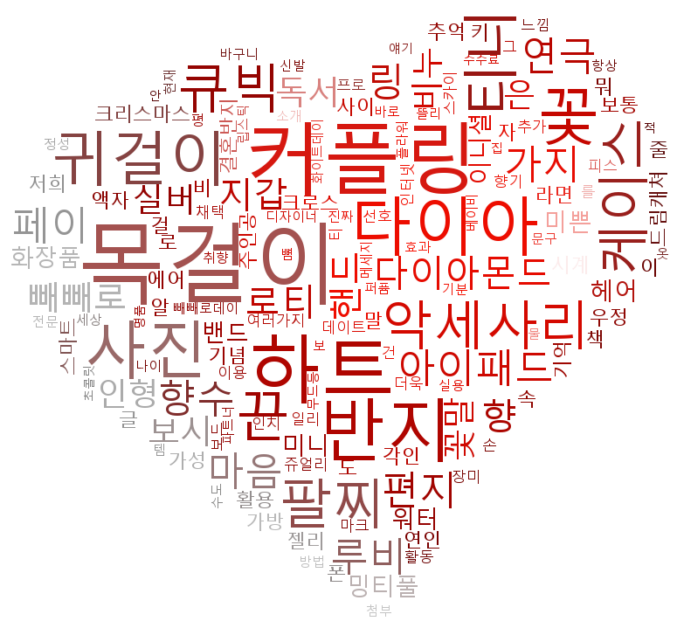

In [69]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()